 # 1. Problem Statement
 
         Given the datasets containing exams, clinical data, and information about the patient's sex and age, build a 
         predictive model to indicate those who are likely to have a heart attack.
         
         To classify / predict whether a patient is prone to heart failure depending on multiple attributes.

# 2. Features Description

### Age
    age of the patient [years]
    
### Sex
    sex of the patient [M: Male, F: Female]
    
###    ChestPainType
    chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    
###    RestingBP
    resting blood pressure [mm Hg]
    
###    Cholesterol
    serum cholesterol [mm/dl]
    
###    FastingBS
    fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    
###    RestingECG
    resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    
###    MaxHR
    maximum heart rate achieved [Numeric value between 60 and 202]
    
###    ExerciseAngina
    exercise-induced angina [Y: Yes, N: No]
    
###    Oldpeak
    oldpeak = ST [Numeric value measured in depression]
    
###    ST_Slope
    the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    
###    HeartDisease
    output class [1: heart disease, 0: Normal]

# 3. Improt Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, f1_score,confusion_matrix, accuracy_score, precision_score, recall_score, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# 4. Read Data

In [2]:
df = pd.read_csv('C:/Users/n1nja/Downloads/heart/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 5. Data information

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### There are 6 Numeric and 6 Categorical features in the data.

In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

 ### No null values present in the data!

In [9]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# 6. Data Analysis and Visualization

### 6.1 Mean values of all the features for cases of heart diseases and non-heart diseases.

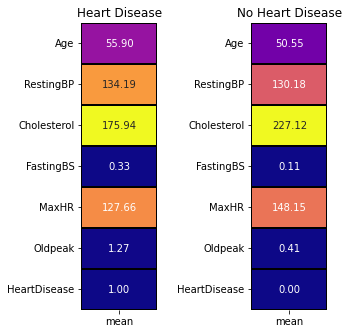

In [10]:
yes = df[df['HeartDisease'] == 1].describe().T
no = df[df['HeartDisease'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

### 6.2 Data set is balanced
    The majority of the Patient have Heart Disease. The class dont have class imabalance problem

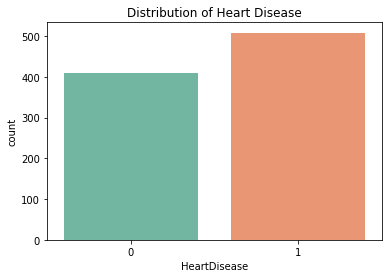

In [11]:
sns.countplot(x="HeartDisease", data = df, palette = "Set2")
plt.title('Distribution of Heart Disease')
plt.show()

### 6.3 Relationship of Age with Heart Disease Class

    We can see that from graph majority of the patient with Heart Disease are aged and lies between 55 - 77.
    The patients with Normal Heart Condition lies betwen age 30 to 55
    There is a fine line between people with Heat Disease and Normal

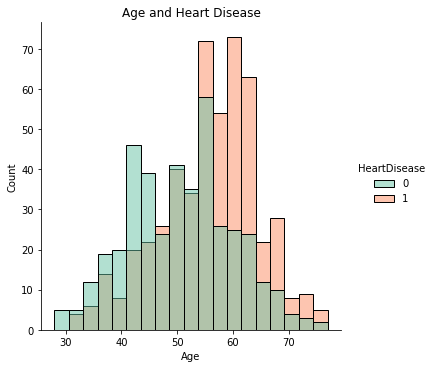

In [12]:
sns.displot(df, x="Age", hue = 'HeartDisease', palette = "Set2")
plt.title('Age and Heart Disease')
plt.show()

### 6.4 Distribution of Sex Feature
    The Majority of the population is the MALE.
    Now we will look at the Distribution of Male and Female with respect to Heart Disease and Normal Patients

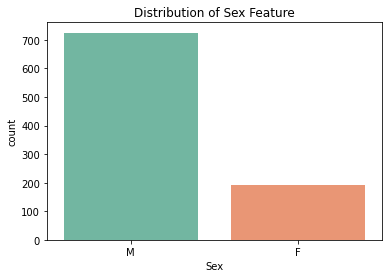

In [13]:
sns.countplot(x="Sex", data = df, palette = "Set2")
plt.title('Distribution of Sex Feature')
plt.show()

    We can see from below graph, The majority of the males have Heart Disease
    In case of Females, the heart disease ratio is low.

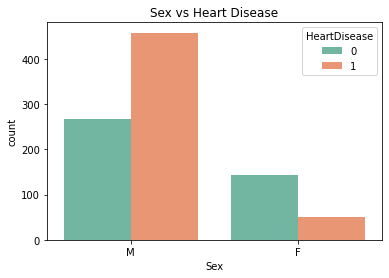

In [14]:
sns.countplot(x="Sex", hue = 'HeartDisease', data = df, palette = "Set2")
plt.title('Sex vs Heart Disease')
plt.show()

### 6.5 Relationship of Chest Pain with Heart Disease Class

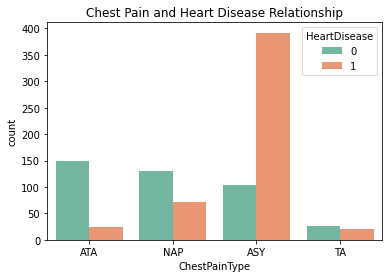

In [15]:
sns.countplot(x="ChestPainType", hue = 'HeartDisease', data = df, palette = "Set2")
plt.title('Chest Pain and Heart Disease Relationship')
plt.show()

    From the plot we can see that the patinets with Asymptomatic Chest Pain are more likely to get the Heart Failure.
    The patients with typical Angina are also at high risk of Hear Failure

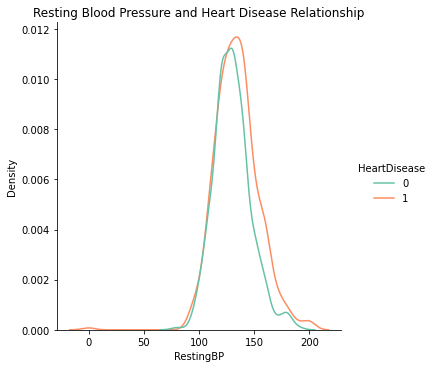

In [16]:
sns.displot(df, x="RestingBP", hue='HeartDisease', kind = 'kde', palette = "Set2" )
plt.title('Resting Blood Pressure and Heart Disease Relationship')
plt.show()

    We can see that from graph, The trend of Normal People and People with Heart Disease is the same

### 6.6 Relationship of Cholesterol with Heart Disease Class

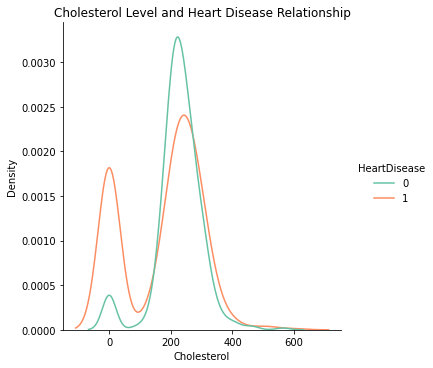

In [17]:
sns.displot(df, x="Cholesterol", hue='HeartDisease', kind = 'kde', palette = "Set2")
plt.title('Cholesterol Level and Heart Disease Relationship')
plt.show()

    The relationship of Cholestrol level and Heart Disease is very distorted. We can see that people with High Cholestrol   are more likely to Normal people

### 6.7 Relationship of Fasting Blood Sugar with Heart Disease Class
    If blood sugar is greater than 120 md/dl, then the fasting sugar considered as high and assigned with 1 value in data.
    If the Sugar is below 120 it is considered as normal and assigned with 0 value in data.

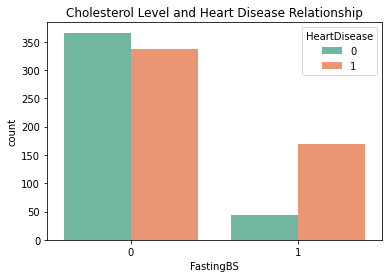

In [18]:
sns.countplot( x="FastingBS", hue='HeartDisease', data =df, palette = "Set2")
plt.title('Cholesterol Level and Heart Disease Relationship')
plt.show()

### 6.8 Relationship of Resting ECG with Heart Disease Class

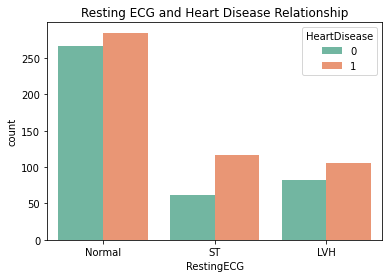

In [19]:
sns.countplot( x="RestingECG", hue='HeartDisease', data =df,palette = "Set2" )
plt.title('Resting ECG and Heart Disease Relationship')
plt.show()

    From the above plot of ECG, We can say that ECG is very important feature for us. As the ECG result are "ST" or "LVH", there is high chance of heart Failure.
    We can also see that the people with Normal ECG also get Heart Disease, which means people can also get heart disease with normal ECG, as it changes suddenly with heart conditions.

### 6.9 Relationship of Maximum Heart Rate with Heart Disease Class
    MaxHR means Maximum Heart Rate Achieved. It contains Nuemeric values between 60 and 202

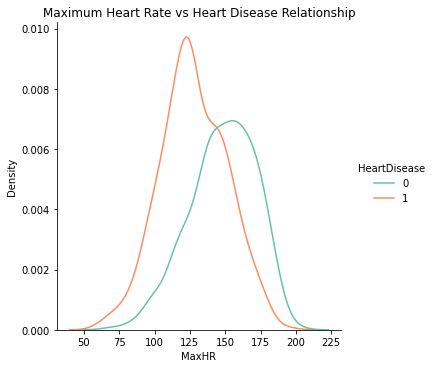

In [20]:
sns.displot(df, x="MaxHR", hue='HeartDisease', kind = 'kde', palette = "Set2")
plt.title('Maximum Heart Rate vs Heart Disease Relationship')
plt.show()

### 6.10 Relationship of ExerciseAngina with Heart Disease Class

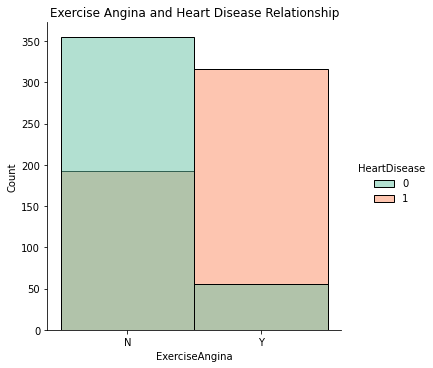

In [21]:
sns.displot(df, x="ExerciseAngina", hue='HeartDisease', palette = "Set2")
plt.title('Exercise Angina and Heart Disease Relationship')
plt.show()

    We can see that from the Graph, the People with Exercise Angina is more likely to get the Heart Disease/Heart Failure.
    This mean the patients have coronary artery disease

### 6.11 Relationship of Old peak with Heart Disease Class

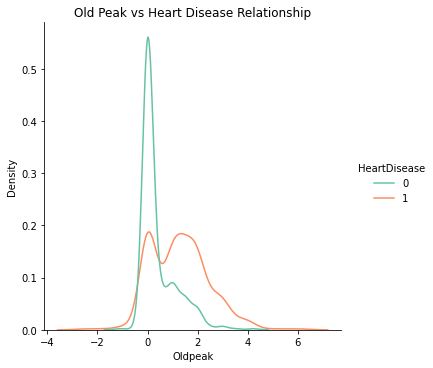

In [22]:
sns.displot(df, x="Oldpeak", hue='HeartDisease', kind = 'kde', palette = "Set2" )
plt.title('Old Peak vs Heart Disease Relationship')
plt.show()

    From the above plot we can see that if the value of Oldpeal is lower then equals to 0, there is less chance of Heart Disease and Heart Failure.
    From the plot, we can also see that if the value of old peak is greater than 0 there is high chance of Heart Disease.

### 6.12 Relationship of ST Slope with Heart Disease Class

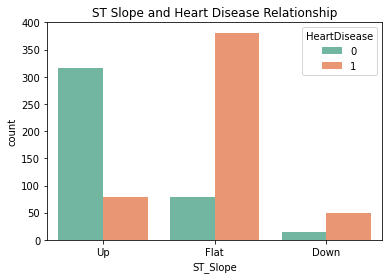

In [23]:
sns.countplot( x="ST_Slope", hue='HeartDisease', data =df, palette = "Set2"  )
plt.title('ST Slope and Heart Disease Relationship')
plt.show()

    We can see that from the plot, if the slope gone flat and Down, there is high liklyhood of Heart Disease.

# 7. Modelling

#### Dividing features into Numerical and Categorical

In [24]:
cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

In [25]:
le = LabelEncoder()
for i in cat_features:
    df[i] =  le.fit_transform(df[i])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [26]:
X = df.drop(columns = ['HeartDisease'])
Y = df[['HeartDisease']]

In [27]:
df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000


#### Data Scaling

In [28]:
sc =  StandardScaler()
scaled_data = sc.fit_transform(X)

In [29]:
scaled_data

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

#### Train Test Split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 3)

In [31]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((688, 11), (230, 11), (688, 1), (230, 1))

#### ML modeling

## 7.1.Logistic Regression

In [32]:
lr =  LogisticRegression()
lr.fit(X_train, Y_train)

lr_predict = lr.predict(X_test)

In [33]:
print(classification_report(Y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.90      0.87      0.88       126

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230



In [34]:
log_accuracy = round(accuracy_score(lr_predict, Y_test) * 100, 2)
log_f1 = round(f1_score(lr_predict, Y_test) * 100, 2)
print("Logistic Regression")
print("Accuracy = ",log_accuracy)
print("F1 score = ",log_f1)

Logistic Regression
Accuracy =  87.39
F1 score =  88.26


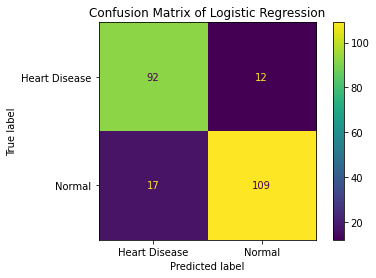

In [35]:
plot_confusion_matrix(lr, X_test, Y_test, display_labels=['Heart Disease', 'Normal'])
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

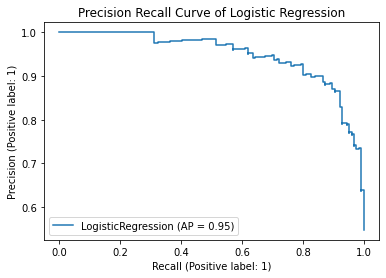

In [36]:
plot_precision_recall_curve(lr, X_test, Y_test)
plt.title('Precision Recall Curve of Logistic Regression')
plt.show()

## 7.2. SVM

In [37]:
SVM = svm.SVC()
SVM.fit(X_train, Y_train)

SVM_predict = SVM.predict(X_test)

In [38]:
print(classification_report(Y_test, SVM_predict))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       104
           1       0.78      0.80      0.79       126

    accuracy                           0.77       230
   macro avg       0.76      0.76      0.76       230
weighted avg       0.76      0.77      0.76       230



In [39]:
svm_accuracy = round(accuracy_score(SVM_predict, Y_test) * 100, 2)
svm_f1 = round(f1_score(SVM_predict, Y_test) * 100, 2)
print("SVM")
print("Accuracy = ",svm_accuracy)
print("F1 score = ",svm_f1)

SVM
Accuracy =  76.52
F1 score =  78.91


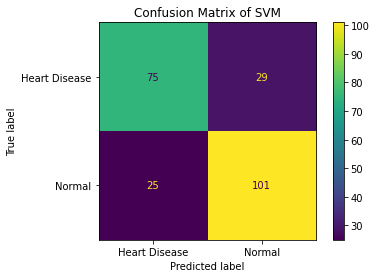

In [40]:
plot_confusion_matrix(SVM, X_test, Y_test, display_labels=['Heart Disease', 'Normal'])
plt.title('Confusion Matrix of SVM')
plt.show()

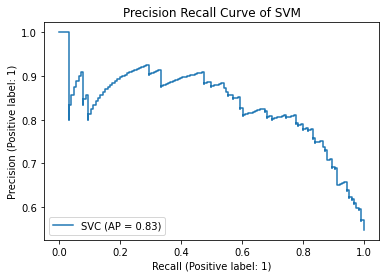

In [41]:
plot_precision_recall_curve(SVM, X_test, Y_test)
plt.title('Precision Recall Curve of SVM')
plt.show()

## 7.3. Random Forest Classifier

In [42]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
rfc_predict = rfc.predict(X_test)

In [43]:
print(classification_report(Y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       104
           1       0.90      0.93      0.91       126

    accuracy                           0.90       230
   macro avg       0.91      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



In [44]:
random_forest_accuracy = round(accuracy_score(rfc_predict, Y_test) * 100, 2)
random_forest_f1 = round(f1_score(rfc_predict, Y_test) * 100, 2)
print("Random Forest")
print("Accuracy = ",random_forest_accuracy)
print("F1 score = ",random_forest_f1)

Random Forest
Accuracy =  90.43
F1 score =  91.41


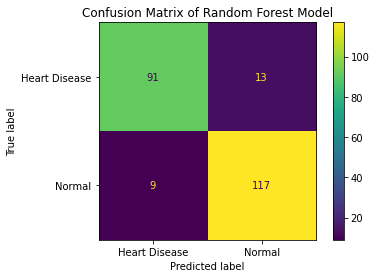

In [45]:
plot_confusion_matrix(rfc, X_test, Y_test, display_labels=['Heart Disease', 'Normal'])
plt.title('Confusion Matrix of Random Forest Model')
plt.show()

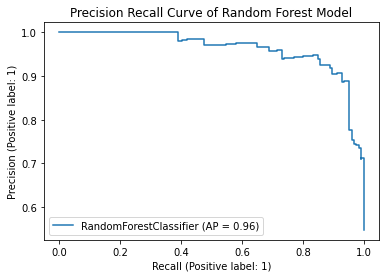

In [46]:
plot_precision_recall_curve(rfc, X_test, Y_test)
plt.title('Precision Recall Curve of Random Forest Model')
plt.show()

## 7.4. Decision Tree

In [47]:
decision = DecisionTreeClassifier()
decision.fit(X_train, Y_train)
y_pred_Decision = decision.predict(X_test)

In [48]:
print(classification_report(Y_test, y_pred_Decision))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       104
           1       0.88      0.81      0.84       126

    accuracy                           0.83       230
   macro avg       0.83      0.84      0.83       230
weighted avg       0.84      0.83      0.84       230



In [49]:
decision_accuracy = round(accuracy_score(y_pred_Decision, Y_test) * 100, 2)
decision_f1 = round(f1_score(y_pred_Decision, Y_test) * 100, 2)
print("Decision Tree")
print("Accuracy = ",decision_accuracy)
print("F1 score = ",decision_f1)

Decision Tree
Accuracy =  83.48
F1 score =  84.3


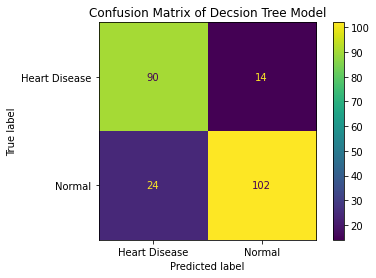

In [50]:
plot_confusion_matrix(decision, X_test, Y_test, display_labels=['Heart Disease', 'Normal'])
plt.title('Confusion Matrix of Decsion Tree Model')
plt.show()

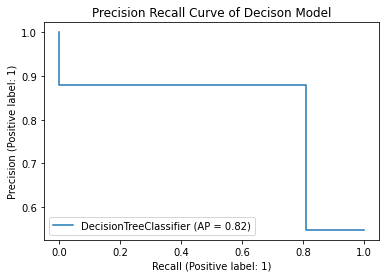

In [51]:
plot_precision_recall_curve(decision, X_test, Y_test)
plt.title('Precision Recall Curve of Decison Model')
plt.show()

# 8. Comparing Models

In [52]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','Support Vector Machines','Decision Tree','Random Forest'
    ],
    'Model Accuracy Score': [
        log_accuracy, svm_accuracy, decision_accuracy, random_forest_accuracy,
    ],
    'Model f1 Score': [
        log_f1, svm_f1, decision_f1, random_forest_f1,
    ]
})

In [53]:
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Model Accuracy Score,Model f1 Score
3,Random Forest,90.43,91.41
0,Logistic Regression,87.39,88.26
2,Decision Tree,83.48,84.30
1,Support Vector Machines,76.52,78.91


# 9.Conclusion

    According to the classifiers results, it can be concluded that the best results have been obtained by the following      models, respectively:
    1. Random Forest
    2. Logistic Regression
    3. Decision Tree
    4. Support Vector Machines
 
    We can enhance model by adding more data or observations to dataset, Fine tuning parameters or Feature Selection
    Such prediction tools can be widely used to detect more that just heart disease.